In [2]:
# 1. Does remote work has an effect on salary in DS?
# 2. Does company size has an effect on salary in DS?

In [3]:
# data analysis and wrangling
import pandas as pd
import numpy as np

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
df = pd.read_csv('ds_salaries.csv')
df = df.drop(['Unnamed: 0'], axis = 1)
df['salary_k'] = df['salary']/1000
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   work_year           607 non-null    int64  
 1   experience_level    607 non-null    object 
 2   employment_type     607 non-null    object 
 3   job_title           607 non-null    object 
 4   salary              607 non-null    int64  
 5   salary_currency     607 non-null    object 
 6   salary_in_usd       607 non-null    int64  
 7   employee_residence  607 non-null    object 
 8   remote_ratio        607 non-null    int64  
 9   company_location    607 non-null    object 
 10  company_size        607 non-null    object 
 11  salary_k            607 non-null    float64
dtypes: float64(1), int64(4), object(7)
memory usage: 57.0+ KB


In [8]:
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,salary_k
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L,70.0
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S,260.0
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M,85.0
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S,20.0
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L,150.0
...,...,...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M,154.0
603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M,126.0
604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M,129.0
605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M,150.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   work_year           607 non-null    int64  
 1   experience_level    607 non-null    object 
 2   employment_type     607 non-null    object 
 3   job_title           607 non-null    object 
 4   salary              607 non-null    int64  
 5   salary_currency     607 non-null    object 
 6   salary_in_usd       607 non-null    int64  
 7   employee_residence  607 non-null    object 
 8   remote_ratio        607 non-null    int64  
 9   company_location    607 non-null    object 
 10  company_size        607 non-null    object 
 11  salary_k            607 non-null    float64
dtypes: float64(1), int64(4), object(7)
memory usage: 57.0+ KB


In [10]:
df.isnull().values.any()

False

In [11]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio,salary_k
count,607.000000,6.070000e+02,607.000000,607.00000,607.000000
mean,2021.405272,3.240001e+05,112297.869852,70.92257,324.000063
std,0.692133,1.544357e+06,70957.259411,40.70913,1544.357487
min,2020.000000,4.000000e+03,2859.000000,0.00000,4.000000
25%,2021.000000,7.000000e+04,62726.000000,50.00000,70.000000
50%,2022.000000,1.150000e+05,101570.000000,100.00000,115.000000
75%,2022.000000,1.650000e+05,150000.000000,100.00000,165.000000
max,2022.000000,3.040000e+07,600000.000000,100.00000,30400.000000


In [12]:
df.describe(include=['O'])

,experience_level,employment_type,job_title,salary_currency,employee_residence,company_location,company_size
count,607,607,607,607,607,607,607
unique,4,4,50,17,57,50,3
top,SE,FT,Data Scientist,USD,US,US,M
freq,280,588,143,398,332,355,326


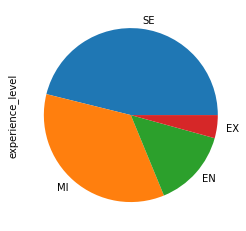

In [233]:
df['experience_level'].value_counts().plot(kind="pie")
plt.show()

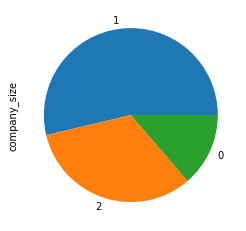

In [234]:
df['company_size'].value_counts().plot(kind="pie")
plt.show()

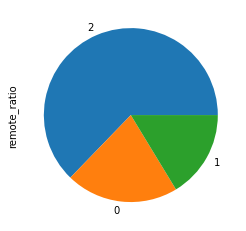

In [235]:
df['remote_ratio'].value_counts().plot(kind="pie")
plt.show()

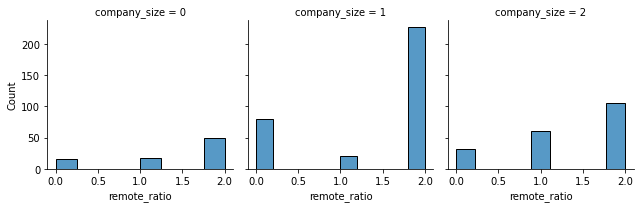

In [236]:
g = sns.FacetGrid(df, col="company_size")
g.map_dataframe(sns.histplot, "remote_ratio")

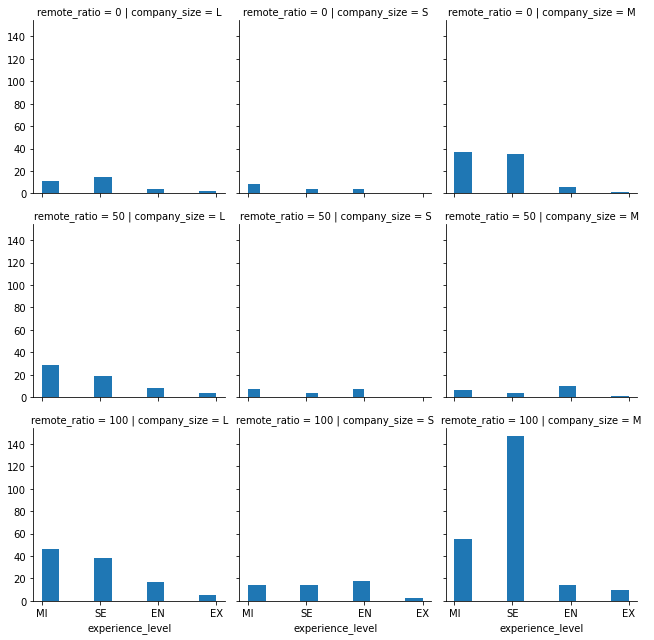

In [18]:
grid = sns.FacetGrid(df, col='company_size', row='remote_ratio')
grid.map(plt.hist, 'experience_level')
grid.add_legend();

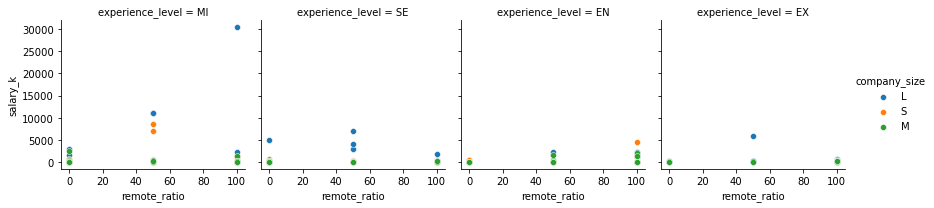

In [14]:
 g = sns.FacetGrid(df, col="experience_level", hue="company_size")
g.map_dataframe(sns.scatterplot, x="remote_ratio", y="salary_k")
g.add_legend()

In [16]:
df[['company_size', 'salary_k']].groupby(['company_size'], as_index=False).mean().sort_values(by='salary_k', ascending=True)

,company_size,salary_k
1,M,146.522500
2,S,377.710012
0,L,593.695818


In [17]:
df[['remote_ratio', 'salary_k']].groupby(['remote_ratio'], as_index=False).mean().sort_values(by='salary_k', ascending=True)

,remote_ratio,salary_k
0,0,218.147843
2,100,259.499903
1,50,708.018172


<AxesSubplot:>

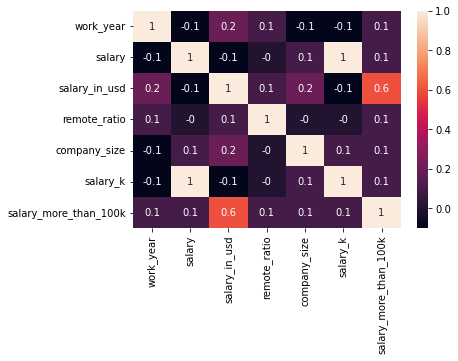

In [241]:
sns.heatmap(df.corr().round(1), annot=True)

<AxesSubplot:xlabel='remote_ratio', ylabel='salary_k'>

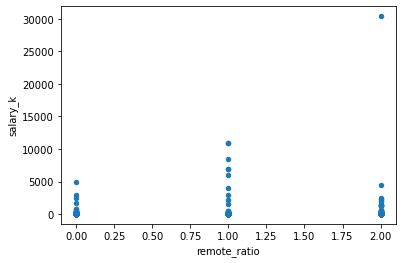

In [244]:
df.plot("remote_ratio", "salary_k", "scatter")